# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola
- Renomear o notebook para C209-PV1.1-NOME_SOBRENOME_MATRICULA
- Enviar no teams a pasta com **todas** as mídias zipada com o nome "NOME_SOBRENOME_MATRICULA.zip" **10pts.**

# Parte teórica 5pts.

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - A etapa de **quantização** em um processo de compressão de dados consiste em aumentar a aleatoriedade das informações.

In [ ]:
F. A quantização é o processo de mapeamento de valores do sinal em níveis.

2 - Compresão do tipo jpeg consiste é uma compressão sem perdas.

In [ ]:
F. Compressão JPEG possui perdas, pois elimina algumas informações da imagem original, especialmente de alta frequência.

3 - Histogramas de duas imagens distintas não serão nunca iguais

In [ ]:
F.Histogramas podem ser iguais, mesmo com imagens diferentes, pois podem possuir a mesma proporção de cores.

4 - O método RLE de compressão de dados sempre gera um resultado com menor quantidade de dados (comprimido).

In [ ]:
F. Caso haja uma variação muito alta de dados, com baixa frequência de cada um, pode não ser menor.

5 - No contexto de áudios, frequência de amostragem e os dados são necessários para manipulação, edição e utilização no python.

In [ ]:
V.

# Parte prática 85pts.

## Material de apoio

### Importações

```
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
```

### Histograma
```
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```

### Manipulação de imagens

```
(l,c,p) = img.shape
plt.imshow(imagem)
```

### Forçando uma imagem de uma página para 3 páginas
```
  imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
  imagem_3p[:,:, 0] = frame_1p
  imagem_3p[:,:, 1] = frame_1p
  imagem_3p[:,:, 2] = frame_1p
```

### Detecção de bordas
```
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255
```

### Manipulação de vídeo
```
video = mpe.VideoFileClip("video.mp4")
frame = video.get_frame(2 / video.fps)
frame = video.get_frame(2)
video.ipython_display(width=480)
video_modificado = video.fl_image(func_modificar)
subclip = video.subclip(0,2)
subclip = video.subclip(3)
parts = mpe.concatenate_videoclips([part1, part])
video.write_videofile('video.mp4')
```

### Imagem binária
```
 image_bw = np.average(frame, axis=2).astype(np.float64)
 image_bin = np.zeros(shape=(l,c),dtype=np.uint8)
 image_bin[image_bw > thresh] = 255
```

### Reflexão

#### Numpy (recomendado)
```
    img_refl = np.zeros(shape=imagem.shape, dtype=np.uint8)
    img_refl[::1, ::-1] = imagem
```

#### Iterativo (mais lento)
```
img_refl = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        img_refl[new_y, new_x] = img[i, j]
```


**1 -** Importe as bibliotecas que serão usadas

In [40]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt

**2 -** Abra o vídeo "boydancing.mp4" e salve-o em uma variável, pegue o **frame do segundo 3** e o exiba.

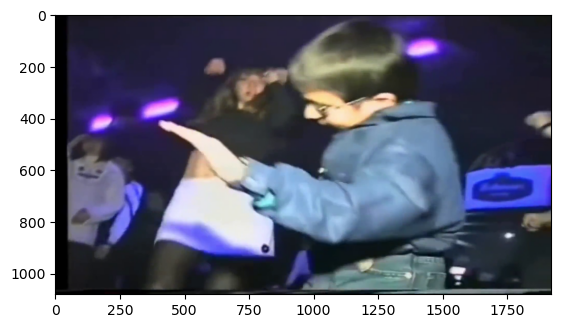

In [41]:
video = mpe.VideoFileClip("boydancing.mp4")
img = video.get_frame(3)
plt.imshow(img)

**3 -** Exiba o histograma RGB do frame selecionado.

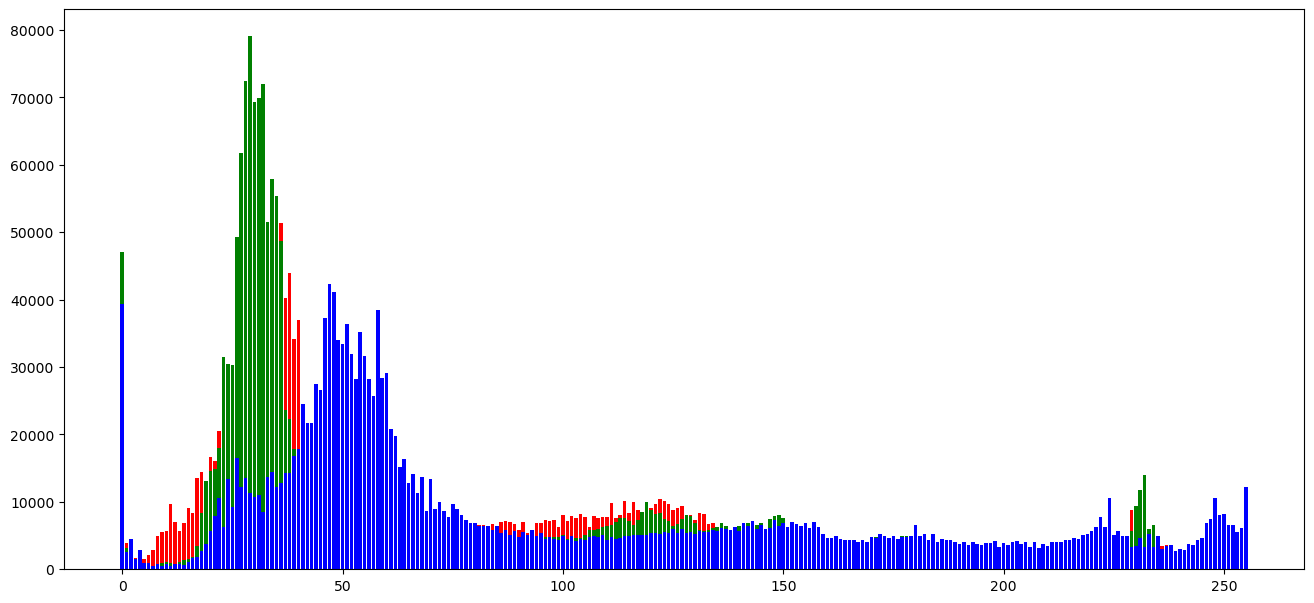

In [42]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

show_histogram(img)

**4 -** Crie uma função que receba um frame e retorne um frame em imagem binário com **treshold de 130**, aplique essa função no vídeo e observe o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

In [43]:
def funct1(frame):
    (l,c,p) = frame.shape
    treshold = 130
    imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
    image_bw = np.average(frame, axis=2).astype(np.float64)
    image_bin = np.zeros(shape=(l,c),dtype=np.uint8)
    image_bin[image_bw > treshold] = 255
    
    imagem_3p[:,:, 0] = image_bin
    imagem_3p[:,:, 1] = image_bin
    imagem_3p[:,:, 2] = image_bin

    return imagem_3p

video_modificado = video.fl_image(funct1)

**5 -** Crie uma função que receba um frame e realize a detecção de bordas nele com **treshold de valor 12**, aplique essa função no vídeo e observe o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

In [44]:
def funct2(frame):
    (l,c,p) = frame.shape
    imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
    threshold = 12
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
       
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)
    
    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255

    imagem_3p[:,:, 0] = imagem_border
    imagem_3p[:,:, 1] = imagem_border
    imagem_3p[:,:, 2] = imagem_border

    return imagem_3p

video_modificado = video.fl_image(funct2)

**6 -** Crie uma função que receba um frame e retorne um frame refletido em relação ao eixo x, aplique essa função no vídeo e observe o resultado. 

In [45]:
def funct3(frame):
    img_refl = np.zeros(shape=frame.shape, dtype=np.uint8)
    img_refl[::-1, ::1] = frame

    return img_refl

video_modificado = video.fl_image(funct3)

**7 -** Separe o vídeo original em 3 subclips:
- Segundos 0 ao 2: Aplicar conversão para binário
- Segundos 2 ao 4: Aplicar reflexão no eixo x
- Segundos 4 em diante: Aplicar detecção de borda

**Una esses clips em um único vídeo e exiba o resultado.**

In [46]:
subclip1 = video.subclip(0,2)
subclip1 = subclip1.fl_image(funct1)

subclip2 = video.subclip(2,4)
subclip2 = subclip2.fl_image(funct3)

subclip3 = video.subclip(4)
subclip3 = subclip3.fl_image(funct2)

resultado = mpe.concatenate_videoclips([subclip1, subclip2, subclip3])

**8 -** Salve o vídeo resultante da última etapa com o nome "resultado.mp4". **20pts.**

In [47]:
resultado.write_videofile('resultado.mp4')

Moviepy - Building video resultado.mp4.
MoviePy - Writing audio in resultadoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video resultado.mp4



Moviepy - Done !
Moviepy - video ready resultado.mp4
